# Tarefa 2 - Produção Energética e Sustentabilidade

### Os Dados
Iremos usar os datasetes <em>energia.csv</em> e <em>meteo.csv</em> dos anos de 2021, 2022 e 2023. 

O dataset de energia contém os seguintes atributos:

- **Data** - o timestamp associado ao registo, ao dia.
- **Hora** - a hora associada ao registo.
- **Normal (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio).
- **Horário Económico (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio).
- **Autoconsumo (kWh)** - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares.
- **Injeção na rede (kWh)** - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

O dataset de meteorologia contém os seguintes atributos:
- **dt** - o timestamp associado ao registo.
- **dt_iso** - a data associada ao registo, ao segundo.
- **city_name** - o local em causa.
- **temp** - temperatura em ºC.
- **feels_like** - sensação térmica em ºC.
- **temp_min** - temperatura mínima sentida em ºC.
- **temp_max** - temperatura máxima sentida em ºC.
- **pressure** - pressão atmosférica sentida em atm.
- **sea_level** - pressão atmosférica sentida ao nível do mar em atm.
- **grnd_level** - pressão atmosférica sentida à altitude local em atm.
- **humidity** - humidade em percentagem.
- **wind_speed** - velocidade do vento em metros por segundo.
- **rain_1h** - valor médio de precipitação.
- **clouds_all** - nível de nebulosidade em percentagem.
- **weather_description** - avaliação qualitativa do estado do tempo.

## Import Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

## Get the data

In [125]:
#! Não devem usar a extenção do VSCode para alinhar os ficheiros csv 
#! porque isso altera os valores dos atributos com whitesapces!

# Datasets da energia produzida 
energia21 = pd.read_csv('datasets/energia_202109-202112.csv', na_filter=False) # na_filter=False para não assumir 'None' como um valor nulo

energia22 = pd.read_csv('datasets/energia_202201-202212.csv', na_filter=False) # na_filter=False para não assumir 'None' como um valor nulo

energia23 = pd.read_csv('datasets/energia_202301-202304.csv')

energia_treino = pd.concat([energia21, energia22], axis=0)
energia_teste = energia23


# Datasets das condições meteorológicas
meteo21 = pd.read_csv('datasets/meteo_202109-202112.csv')

meteo22 = pd.read_csv('datasets/meteo_202201-202212.csv')

meteo23 = pd.read_csv('datasets/meteo_202301-202304.csv')

meteo23_extra = pd.read_csv('datasets/weather_data.csv')

meteo_treino = pd.concat([meteo21, meteo22], axis=0)
meteo_teste = pd.concat([meteo23, meteo23_extra], axis=0)

In [126]:
# energia21.columns
# energia22.columns
# energia23.columns # Não possui o atributo 'Injeção na rede'
print(energia_treino.columns)
print(energia_teste.columns)


# meteo21.columns
# meteo22.columns
# meteo23.columns
print(meteo_treino.columns)
print(meteo_teste.columns)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')


In [127]:
# energia21.info()
# energia22.info()
# energia23.info()

# energia_treino.info()
# energia_teste.info()

# meteo21.info() # sea_level e grnd_level não possuem valores (0) | rain_1h só possui alguns valores (537)
# meteo22.info() # sea_level e grnd_level não possuem valores (0) | rain_1h só possui alguns valores (1898)
# meteo23.info() # sea_level e grnd_level não possuem valores (0) | rain_1h só possui alguns valores (206)

# meteo_treino.info()
# meteo_teste.info()

In [128]:
# energia21.head()
# energia22.head()
# energia23.head()

# meteo21.head() 
# meteo22.head()
# meteo23.head()

# Tratamento de dados

## Missing Values

In [129]:
# meteo_treino.isnull().sum()
meteo_teste.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              2256
grnd_level             2256
humidity                  0
wind_speed                0
rain_1h                2030
clouds_all                0
weather_description       0
dtype: int64

<Axes: >

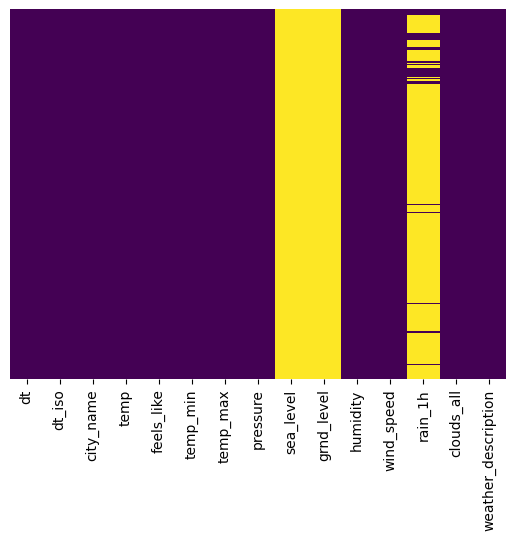

In [130]:
# sns.heatmap(meteo_treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')
sns.heatmap(meteo_teste.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Drop *sea_level* and *grnd_level* do dataset de meteorologia
Iremos dropar estes 2 atributos porque não contém nenhum valor não nulo

In [131]:
meteo_treino.drop(['sea_level'], axis=1, inplace=True)
meteo_treino.drop(['grnd_level'], axis=1, inplace=True)

meteo_teste.drop(['sea_level'], axis=1, inplace=True)
meteo_teste.drop(['grnd_level'], axis=1, inplace=True)

In [132]:
# meteo_treino.head()
# meteo_teste.head()

### Fill with 0 *rain_1h* do dataset de meteorologia

Iremos colocar 0 nos valores nulos de *rain_1h* porque assumimos que não houve precipitação nos casos onde não há valor neste atributo.

In [133]:
# meteo_treino[meteo_treino['rain_1h'].isnull()].info()
# meteo_treino[meteo_treino['rain_1h'] == 0]

meteo_treino.fillna(0, inplace=True)
meteo_teste.fillna(0, inplace=True)


# meteo_treino.info()
meteo_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 0 to 503
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2256 non-null   int64  
 1   dt_iso               2256 non-null   object 
 2   city_name            2256 non-null   object 
 3   temp                 2256 non-null   float64
 4   feels_like           2256 non-null   float64
 5   temp_min             2256 non-null   float64
 6   temp_max             2256 non-null   float64
 7   pressure             2256 non-null   int64  
 8   humidity             2256 non-null   int64  
 9   wind_speed           2256 non-null   float64
 10  rain_1h              2256 non-null   float64
 11  clouds_all           2256 non-null   int64  
 12  weather_description  2256 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 246.8+ KB


<Axes: >

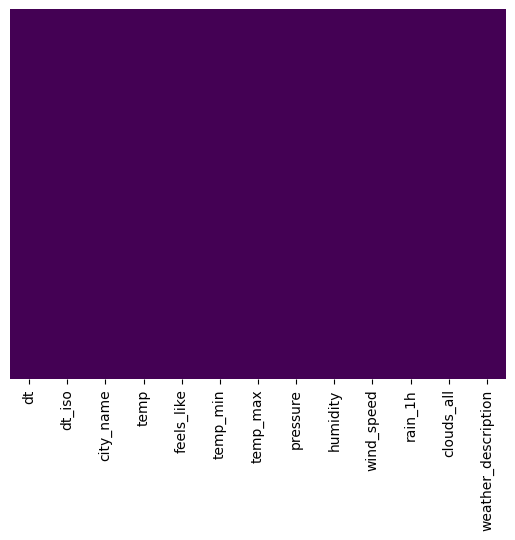

In [134]:
sns.heatmap(meteo_treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# sns.heatmap(meteo_teste.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [135]:
meteo_treino.nunique()
# meteo_teste.nunique()

dt                     11688
dt_iso                 11688
city_name                  1
temp                    2423
feels_like              2702
temp_min                 488
temp_max                 550
pressure                  41
humidity                  82
wind_speed               771
rain_1h                  372
clouds_all               101
weather_description        8
dtype: int64

##### Iremos remover a feature *city_name* porque o valor é único em todo o dataset

##### Iremos também remover a feature *dt* porque existe um valor único para cada registo do dataset e a feature *dt_iso* já possui informação sobre a data do registo.

In [136]:
meteo_treino.drop(['city_name'], axis=1, inplace=True)
meteo_teste.drop(['city_name'], axis=1, inplace=True)

meteo_treino.drop(['dt'], axis=1, inplace=True)
meteo_teste.drop(['dt'], axis=1, inplace=True)

In [137]:
# meteo_treino.info()
meteo_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 0 to 503
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt_iso               2256 non-null   object 
 1   temp                 2256 non-null   float64
 2   feels_like           2256 non-null   float64
 3   temp_min             2256 non-null   float64
 4   temp_max             2256 non-null   float64
 5   pressure             2256 non-null   int64  
 6   humidity             2256 non-null   int64  
 7   wind_speed           2256 non-null   float64
 8   rain_1h              2256 non-null   float64
 9   clouds_all           2256 non-null   int64  
 10  weather_description  2256 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 211.5+ KB


## Tratamento de Datas (*dt_iso*)

In [138]:
meteo_treino['dt_iso'].head()
meteo_teste['dt_iso'].head()

0    2023-01-01 00:00:00 +0000 UTC
1    2023-01-01 01:00:00 +0000 UTC
2    2023-01-01 02:00:00 +0000 UTC
3    2023-01-01 03:00:00 +0000 UTC
4    2023-01-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object

In [139]:
meteo_treino['dt_iso'] = pd.to_datetime(meteo_treino['dt_iso'].str.split(" \+").str[0], format = "%Y-%m-%d %H:%M:%S", errors='coerce')
meteo_teste['dt_iso'] = pd.to_datetime(meteo_teste['dt_iso'].str.split(" \+").str[0], format = "%Y-%m-%d %H:%M:%S", errors='coerce')

In [140]:
assert meteo_treino['dt_iso'].isnull().sum() == 0, 'missing record date'
assert meteo_teste['dt_iso'].isnull().sum() == 0, 'missing record date'

In [141]:
meteo_treino['dt_iso'].head()
# meteo_teste['dt_iso'].head()

# meteo_teste.info()

0   2021-09-01 00:00:00
1   2021-09-01 01:00:00
2   2021-09-01 02:00:00
3   2021-09-01 03:00:00
4   2021-09-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

Renomear o atributo **dt_iso** para **Data** para ficar consistente com o atributo do dataset de energia

In [142]:
meteo_treino.rename(columns={'dt_iso': 'Data'}, inplace=True)
meteo_teste.rename(columns={'dt_iso': 'Data'}, inplace=True)

In [143]:
meteo_treino.head()
# meteo_teste.head()

,Data,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-01 00:00:00,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,2021-09-01 01:00:00,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,2021-09-01 02:00:00,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,2021-09-01 03:00:00,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,2021-09-01 04:00:00,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


De forma a melhorarmos a qualidade do dataset decidimos, criar as colunas **Ano**, **Mês**, **Dia**, **Hora**, a partir dos dados obtidos na coluna Data:

No dataset de treino:

In [144]:
meteo_treino['Data'] = pd.to_datetime(meteo_treino['Data'])


meteo_treino['Ano'] = meteo_treino['Data'].dt.year
meteo_treino['Mês'] = meteo_treino['Data'].dt.month
meteo_treino['Dia'] = meteo_treino['Data'].dt.day
meteo_treino['Hora'] = meteo_treino['Data'].dt.hour

meteo_treino = meteo_treino[['Data', 'Ano', 'Mês','Dia','Hora','feels_like','temp_min','temp_max',	'pressure',	'humidity',	'wind_speed'	,'rain_1h',	'clouds_all',	'weather_description']]
meteo_treino.head()



,Data,Ano,Mês,Dia,Hora,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-01 00:00:00,2021,9,1,0,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,2021-09-01 01:00:00,2021,9,1,1,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,2021-09-01 02:00:00,2021,9,1,2,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,2021-09-01 03:00:00,2021,9,1,3,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,2021-09-01 04:00:00,2021,9,1,4,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


No dataset de teste:

In [145]:
meteo_teste['Data'] = pd.to_datetime(meteo_teste['Data'])


meteo_teste['Ano'] = meteo_teste['Data'].dt.year
meteo_teste['Mês'] = meteo_teste['Data'].dt.month
meteo_teste['Dia'] = meteo_teste['Data'].dt.day
meteo_teste['Hora'] = meteo_teste['Data'].dt.hour


meteo_teste = meteo_teste[['Data', 'Ano', 'Mês','Dia','Hora','feels_like','temp_min','temp_max',	'pressure',	'humidity',	'wind_speed'	,'rain_1h',	'clouds_all',	'weather_description']]
meteo_teste.head()

,Data,Ano,Mês,Dia,Hora,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2023-01-01 00:00:00,2023,1,1,0,12.76,12.72,13.43,1019,95,2.02,3.72,100,moderate rain
1,2023-01-01 01:00:00,2023,1,1,1,13.38,13.43,13.90,1018,95,2.18,3.26,100,moderate rain
2,2023-01-01 02:00:00,2023,1,1,2,13.44,13.48,14.82,1017,95,2.88,2.44,100,moderate rain
3,2023-01-01 03:00:00,2023,1,1,3,13.51,12.01,14.82,1016,95,3.63,1.74,100,moderate rain
4,2023-01-01 04:00:00,2023,1,1,4,13.49,12.01,14.82,1015,95,4.58,1.13,100,moderate rain


# Tratamento do dataset de energia

In [146]:
energia_treino.info()
energia_teste.info()
energia_treino.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    11016 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 602.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kW

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,None
1,2021-09-29,1,0.0,0.0,0.0,None
2,2021-09-29,2,0.0,0.0,0.0,None
3,2021-09-29,3,0.0,0.0,0.0,None
4,2021-09-29,4,0.0,0.0,0.0,None


Adicionamos, tal como no dataset de metereologia, as colunas **Ano**, **Mês**, **Dia**, obtidas a partir de Data:

No dataset de treino:

In [147]:
energia_treino['Data'] = pd.to_datetime(energia_treino['Data'])


energia_treino['Ano'] = energia_treino['Data'].dt.year
energia_treino['Mês'] = energia_treino['Data'].dt.month
energia_treino['Dia'] = energia_treino['Data'].dt.day

energia_treino.head()


,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Ano,Mês,Dia
0,2021-09-29,0,0.0,0.0,0.0,None,2021,9,29
1,2021-09-29,1,0.0,0.0,0.0,None,2021,9,29
2,2021-09-29,2,0.0,0.0,0.0,None,2021,9,29
3,2021-09-29,3,0.0,0.0,0.0,None,2021,9,29
4,2021-09-29,4,0.0,0.0,0.0,None,2021,9,29


No dataset de teste:

In [148]:
energia_teste['Data'] = pd.to_datetime(energia_teste['Data'])


energia_teste['Ano'] = energia_teste['Data'].dt.year
energia_teste['Mês'] = energia_teste['Data'].dt.month
energia_teste['Dia'] = energia_teste['Data'].dt.day

energia_teste.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Ano,Mês,Dia
0,2023-01-01,0,0.0,0.467,0.0,2023,1,1
1,2023-01-01,1,0.0,0.577,0.0,2023,1,1
2,2023-01-01,2,0.0,0.346,0.0,2023,1,1
3,2023-01-01,3,0.0,0.270,0.0,2023,1,1
4,2023-01-01,4,0.0,0.252,0.0,2023,1,1


Transformamos a **Data** do dataset energia no formato da **Data** do dataset meterologia:

Para o dataset de treino:

In [149]:
energia_treino['Data'] = pd.to_datetime(energia_treino['Data'])

energia_treino['Datetime'] = energia_treino['Data'] + pd.to_timedelta(energia_treino['Hora'], unit='h')

energia_treino['Data'] = energia_treino['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

energia_treino.drop(columns=['Datetime'], inplace=True)
energia_treino = energia_treino[['Data','Ano',	'Mês',	'Dia', 'Hora',	'Normal (kWh)',	'Horário Económico (kWh)',	'Autoconsumo (kWh)'	,'Injeção na rede (kWh)']]
energia_treino.head()



,Data,Ano,Mês,Dia,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29 00:00:00,2021,9,29,0,0.0,0.0,0.0,None
1,2021-09-29 01:00:00,2021,9,29,1,0.0,0.0,0.0,None
2,2021-09-29 02:00:00,2021,9,29,2,0.0,0.0,0.0,None
3,2021-09-29 03:00:00,2021,9,29,3,0.0,0.0,0.0,None
4,2021-09-29 04:00:00,2021,9,29,4,0.0,0.0,0.0,None


Para o dataset de teste:

In [150]:
energia_teste['Data'] = pd.to_datetime(energia_teste['Data'])

energia_teste['Datetime'] = energia_teste['Data'] + pd.to_timedelta(energia_teste['Hora'], unit='h')


energia_teste['Data'] = energia_teste['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

energia_teste.drop(columns=['Datetime'], inplace=True)
energia_teste = energia_teste[['Data','Ano',	'Mês',	'Dia', 'Hora',	'Normal (kWh)',	'Horário Económico (kWh)',	'Autoconsumo (kWh)']]
energia_teste.head()

,Data,Ano,Mês,Dia,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
0,2023-01-01 00:00:00,2023,1,1,0,0.0,0.467,0.0
1,2023-01-01 01:00:00,2023,1,1,1,0.0,0.577,0.0
2,2023-01-01 02:00:00,2023,1,1,2,0.0,0.346,0.0
3,2023-01-01 03:00:00,2023,1,1,3,0.0,0.270,0.0
4,2023-01-01 04:00:00,2023,1,1,4,0.0,0.252,0.0


##### Converter a *string* para *datetime*

In [151]:
energia_treino.info()
energia_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Ano                      11016 non-null  int32  
 2   Mês                      11016 non-null  int32  
 3   Dia                      11016 non-null  int32  
 4   Hora                     11016 non-null  int64  
 5   Normal (kWh)             11016 non-null  float64
 6   Horário Económico (kWh)  11016 non-null  float64
 7   Autoconsumo (kWh)        11016 non-null  float64
 8   Injeção na rede (kWh)    11016 non-null  object 
dtypes: float64(3), int32(3), int64(1), object(2)
memory usage: 731.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data       

In [152]:
energia_treino.head()
# energia_teste.head()

,Data,Ano,Mês,Dia,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29 00:00:00,2021,9,29,0,0.0,0.0,0.0,None
1,2021-09-29 01:00:00,2021,9,29,1,0.0,0.0,0.0,None
2,2021-09-29 02:00:00,2021,9,29,2,0.0,0.0,0.0,None
3,2021-09-29 03:00:00,2021,9,29,3,0.0,0.0,0.0,None
4,2021-09-29 04:00:00,2021,9,29,4,0.0,0.0,0.0,None


## Obter os dados metereologicos entre 2022-3-15 e 2022-4-4

In [153]:
# start_datetime_22 = pd.to_datetime('2022-3-15 00:00:00')
# end_datetime_22 = pd.to_datetime('2022-4-4 23:00:00')

# meteo22_data = meteo_treino[(meteo_treino['Data'] >= start_datetime_22) & (meteo_treino['Data'] <= end_datetime_22)]
# meteo22_data

### Converter o ano de 2022 para 2023

In [154]:
# meteo22_data.loc[:,'Data'] = meteo22_data['Data'] + pd.DateOffset(years=1)
# meteo22_data

### Juntar os dados do ano de 2022 aos de 2023 entre as datas 2022-3-15 e 2022-4-4

In [155]:
# meteo_teste = pd.concat([meteo_teste, meteo22_data], axis=0)
# meteo_teste

## Merging the datasets

In [156]:
meteo_treino['Data'] = pd.to_datetime(meteo_treino['Data'])
energia_treino['Data'] = pd.to_datetime(energia_treino['Data'])
meteo_teste['Data'] = pd.to_datetime(meteo_teste['Data'])
energia_teste['Data'] = pd.to_datetime(energia_teste['Data'])


In [157]:
data_treino = pd.merge(energia_treino, meteo_treino, on='Data', how='left')
data_teste = pd.merge(energia_teste, meteo_teste, on='Data', how='left')


In [158]:
# data_treino.head()
data_teste.tail()

# data_treino.info()
# data_teste.info()

,Data,Ano_x,Mês_x,Dia_x,Hora_x,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Ano_y,Mês_y,...,Hora_y,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
2251,2023-04-04 19:00:00,2023,4,4,19,0.953,0.000,0.012,2023,4,...,19,16.18,17.13,17.13,1016,49,0.86,0.0,5,sky is clear
2252,2023-04-04 20:00:00,2023,4,4,20,0.915,0.000,0.000,2023,4,...,20,14.03,15.13,15.13,1017,51,1.71,0.0,2,sky is clear
2253,2023-04-04 21:00:00,2023,4,4,21,0.479,0.000,0.000,2023,4,...,21,11.83,13.13,13.13,1018,51,2.00,0.0,2,sky is clear
2254,2023-04-04 22:00:00,2023,4,4,22,0.000,0.497,0.000,2023,4,...,22,9.63,11.13,14.75,1019,51,2.23,0.0,2,sky is clear
2255,2023-04-04 23:00:00,2023,4,4,23,0.000,0.487,0.000,2023,4,...,23,11.60,11.13,15.62,1019,49,2.51,0.0,2,sky is clear


In [159]:
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Ano_x                    2256 non-null   int32         
 2   Mês_x                    2256 non-null   int32         
 3   Dia_x                    2256 non-null   int32         
 4   Hora_x                   2256 non-null   int64         
 5   Normal (kWh)             2256 non-null   float64       
 6   Horário Económico (kWh)  2256 non-null   float64       
 7   Autoconsumo (kWh)        2256 non-null   float64       
 8   Ano_y                    2256 non-null   int32         
 9   Mês_y                    2256 non-null   int32         
 10  Dia_y                    2256 non-null   int32         
 11  Hora_y                   2256 non-null   int32         
 12  feels_like               2256 non-

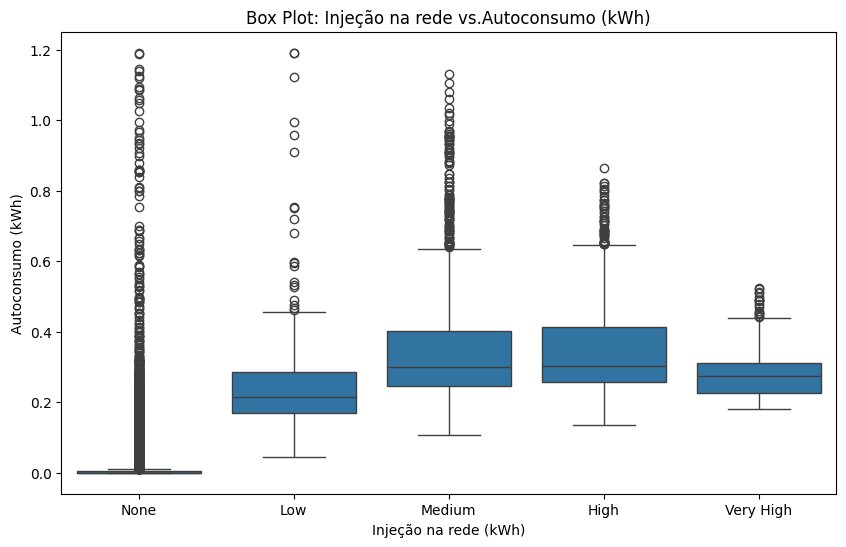

In [160]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Injeção na rede (kWh)', y='Autoconsumo (kWh)', data=data_treino)
plt.title('Box Plot: Injeção na rede vs.Autoconsumo (kWh)')
plt.xlabel('Injeção na rede (kWh)')
plt.ylabel('Autoconsumo (kWh)')
plt.show()

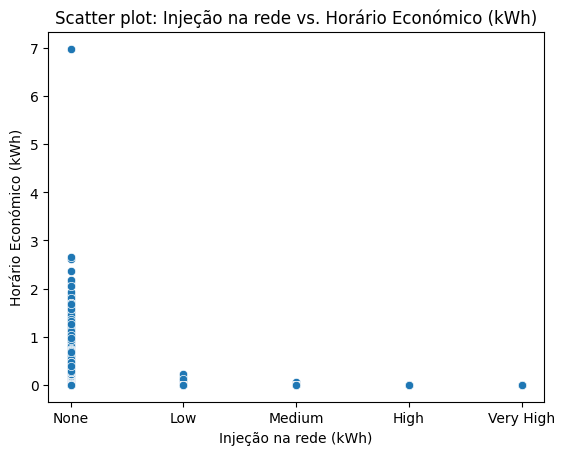

In [161]:
sns.scatterplot(x='Injeção na rede (kWh)', y='Horário Económico (kWh)', data=data_treino)
plt.title('Scatter plot: Injeção na rede vs. Horário Económico (kWh)')
plt.show()


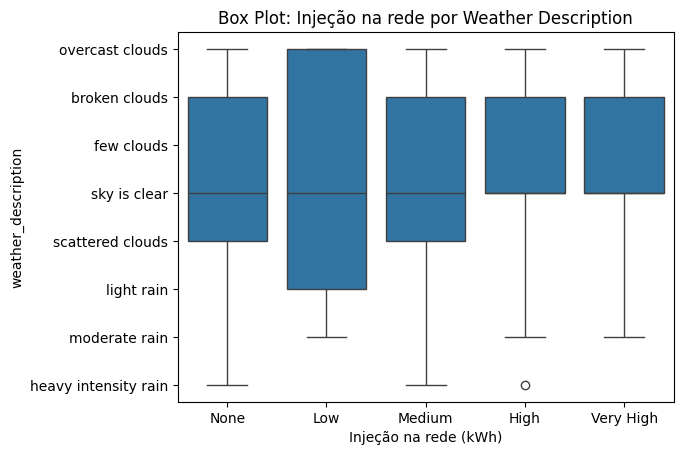

In [162]:
sns.boxplot(x='Injeção na rede (kWh)', y='weather_description', data=data_treino)
plt.title('Box Plot: Injeção na rede por Weather Description')
plt.show()


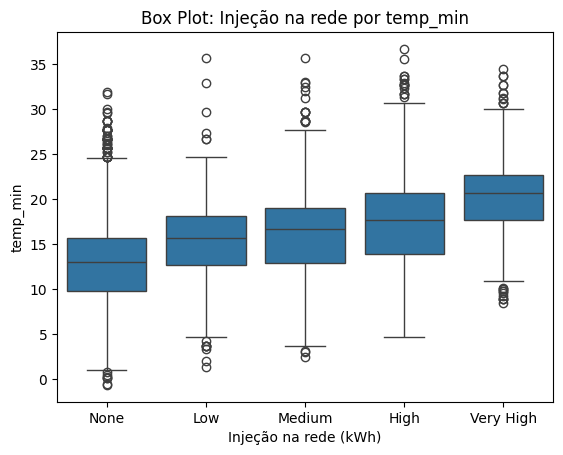

In [163]:
sns.boxplot(x='Injeção na rede (kWh)', y='temp_min', data=data_treino)
plt.title('Box Plot: Injeção na rede por temp_min')
plt.show()

# Criação de ficheiros com os dados de treino e teste

In [164]:
data_treino.to_csv('dataset_treino.csv', index=False)
data_teste.to_csv('dataset_teste.csv', index=False)